This is a tutorial pyflowline notebook.
This tutorial is an example of the pyflowline application using a Model for Prediction Across Scales (MPAS) mesh.

The following publication includes a comprehensive application:
Liao, C., Zhou, T., Xu, D., Cooper, M. G., Engwirda, D., Li, H.-Y., & Leung, L. R. (2023). Topological relationship-based flow direction modeling: Mesh-independent river networks representation. Journal of Advances in Modeling Earth Systems, 15, e2022MS003089. https://doi.org/10.1029/2022MS003089

The full documentation is hosted at: https://pyflowline.readthedocs.io

In order the run this notebook, you must install the PyFlowline package and its dependencies. 
Besides, the visulization requires the optional dependency packages (see the full documentation installation section).
You can also modify the notebook to use a different visualization method.


First, let's load some Python libraries.

In [1]:
#step 1
import os
import sys
from pathlib import Path
from os.path import realpath
import importlib
#install dependencies

iFlag_numpy = importlib.util.find_spec("numpy")
iFlag_gdal = importlib.util.find_spec("osgeo")
iFlag_netcdf4 = importlib.util.find_spec("netCDF4")
iFlag_geopandas = importlib.util.find_spec("geopandas")
iFlag_requests = importlib.util.find_spec("requests") #this one is only for downloading the data

In [2]:
if iFlag_numpy is not None:
    pass
else:
    print("numpy is not installed")

In [3]:
if iFlag_gdal is not None:
    pass
else:
    print("gdal is not installed")

In [4]:
if iFlag_netcdf4 is not None:
    pass
else:
    print("netCDF4 is not installed")

In [5]:
if iFlag_geopandas is not None:
    pass
else:
    print("geopandas is not installed")

In [6]:
if iFlag_requests is not None:
    pass
else:
    print("requests is not installed")

import requests

Then we will check whether some additional packages are installed.

In [7]:
sPath_notebook = Path().resolve()
sPath_parent = str(Path().resolve().parents[0]) 
print(sPath_parent)
#check pyflowline installation
iFlag_pyflowline = importlib.util.find_spec("pyflowline") 
if iFlag_pyflowline is not None:
    pass
else:
    print('The pyflowline package is not installed. We will use the current path to set it up.')
    sys.path.append(sPath_parent)




C:\workspace\python\pyflowline-main
The pyflowline package is not installed. We will use the current path to set it up.


We need to download an additional NetCDF file for this example.
This file is stored on the Github release:
https://github.com/changliao1025/pyflowline/releases/tag/0.2.0
https://github.com/changliao1025/pyflowline/releases/download/0.2.0/lnd_cull_mesh.nc

In [8]:

#download the MPAS mesh from the github release
sFilename_mpas = 'https://github.com/changliao1025/pyflowline/releases/download/0.2.0/lnd_cull_mesh.nc'

#combind folder with filename to get the full path
sFolder_data = os.path.join(sPath_parent, 'data')
sFolder_data_susquehanna =  os.path.join(sFolder_data, 'susquehanna')
sFolder_input = os.path.join(sFolder_data_susquehanna, 'input')

sFilename_download = os.path.join(sFolder_input, 'mpas_mesh.nc')
print(sFilename_download)

# Send an HTTP GET request to the URL
response = requests.get(sFilename_mpas)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response to the local file
    with open(sFilename_download, 'wb') as file:
        file.write(response.content)
    print(f"File '{sFilename_download}' downloaded successfully.")
else:
    print(f"Failed to download file from '{sFilename_mpas}'.")

C:\workspace\python\pyflowline-main\data\susquehanna\input\mpas_mesh.nc
File 'C:\workspace\python\pyflowline-main\data\susquehanna\input\mpas_mesh.nc' downloaded successfully.


Now we can import a few python function within pyflowline.
The pyflowline python package uses the OOP approach to manage each simulation.

In [9]:
#step 3
#load the read configuration function
from pyflowline.change_json_key_value import change_json_key_value
from pyflowline.pyflowline_read_model_configuration_file import pyflowline_read_model_configuration_file

pyflowline uses a json file for configuration, an example json file is provided.
check whether a configuration exists

In [10]:
sFilename_configuration_in = realpath( sPath_parent +  '/data/susquehanna/input/pyflowline_susquehanna_mpas.json' )
if os.path.isfile(sFilename_configuration_in):
    pass
else:
    print('This configuration does not exist: ', sFilename_configuration_in )

In [11]:
#step 4B(optional)
#we can check what is the content of this json file
import json
with open(sFilename_configuration_in, 'r') as pJSON:
    parsed = json.load(pJSON)
    print(json.dumps(parsed, indent=4))

{
    "sFilename_model_configuration": "/qfs/people/liao313/workspace/python/pyflowline/pyflowline/config/hexwatershed_susquehanna_mpas.json",
    "sWorkspace_data": "/people/liao313/data",
    "sWorkspace_output": "/compyfs/liao313/04model/pyflowline/susquehanna",
    "sWorkspace_project": "/hexwatershed/susquehanna",
    "sWorkspace_bin": "/people/liao313/bin",
    "sRegion": "susquehanna",
    "sModel": "pyflowline",
    "sJob": "hex",
    "iFlag_standalone": 1,
    "iFlag_create_mesh": 1,
    "iFlag_mesh_boundary": 1,
    "iFlag_save_mesh": 1,
    "iFlag_simplification": 1,
    "iFlag_intersect": 1,
    "iFlag_flowline": 1,
    "iFlag_use_mesh_dem": 1,
    "iFlag_global": 0,
    "iFlag_multiple_outlet": 0,
    "iFlag_rotation": 0,
    "iCase_index": 1,
    "iMesh_type": 4,
    "dLongitude_left": -79,
    "dLongitude_right": -74.5,
    "dLatitude_bot": 39.2,
    "dLatitude_top": 42.8,
    "dResolution_degree": 5000,
    "dResolution_meter": 5000,
    "sDate": "20220110",
    "sMesh_

The meaning of these json keywords are explained in the pyflowline documentation: https://pyflowline.readthedocs.io/en/latest/data/data.html#inputs

For some parameters, we can change them using the following function call.

For some other parameters (e.g., path to file), you need to modify the json file using a text editor.

If the function returns an error, you should update the json file(s). 

Now set up some keywords

In [12]:
#step 5, set up some parameters
sMesh_type = 'mpas'
iCase_index = 1
dResolution_meter=5000
sDate='20230101'

In [13]:
#we need to update a few parameters in the configuration file before we can create the flowline object
sFilename_basins =  realpath( os.path.join(sFolder_input , 'pyflowline_susquehanna_basins.json' ))
sFilename_mesh_boundary = realpath(os.path.join(sFolder_input, 'boundary_wgs.geojson'))

change_json_key_value(sFilename_configuration_in, 'sFilename_mesh_netcdf', sFilename_download)
change_json_key_value(sFilename_configuration_in, 'sFilename_mesh_boundary', sFilename_mesh_boundary)
change_json_key_value(sFilename_configuration_in, 'sFilename_basins', sFilename_basins)

sFilename_flowline = realpath( os.path.join(sFolder_input, 'flowline.geojson') )
change_json_key_value(sFilename_basins, 'sFilename_flowline_filter', sFilename_flowline, iFlag_basin_in=1)
sWorkspace_output = os.path.join(sFolder_data_susquehanna, 'output')
change_json_key_value(sFilename_configuration_in, 'sWorkspace_output', sWorkspace_output)

we can now call the function to create an object

In [14]:
#the read function accepts several keyword arguments that can be used to change the default parameters.
#the normal keyword arguments are:
#iCase_index_in: this is an ID to identify the simulation case
#sMesh_type_in: this specifies the mesh type ('mpas' in this example)
#sDate_in: this specifies the date of the simulation, the final output folder will have a pattern such as 'pyflowline20230901001', where pyflowline is model, 20230901 is the date, and 001 is the case index.
oPyflowline = pyflowline_read_model_configuration_file(sFilename_configuration_in, iCase_index_in=iCase_index, 
                                                    sMesh_type_in= sMesh_type, sDate_in=sDate)

/compyfs/liao313/04model/pyflowline/susquehanna


In [15]:
#other than setting the paraemeter using the read model configuration fucntion, user can also change model parameters after creating the model object
#rememere that, it is recommended to set output folder using the read model configuration function since the change_model_parameter function will not update output folder
#only a list of parameters can be changed, for full list, please check the documentation
#in this example, we will change the mesh file name
#the function will check the data type, if incorrect data type is provided, it will raise an error
oPyflowline.change_model_parameter('sFilename_mesh_netcdf', sFilename_download) #because the mpas mesh already contains elevation, we do not need to set the elevation file name
#we will set the boundary file name
#this file should be located in the input folder
oPyflowline.change_model_parameter('sFilename_mesh_boundary', sFilename_mesh_boundary)

#we can also set for individual basin in the domain, in this example, we only has one basin.
#remember that, each basin can have different parameters, so if you want to set them different (for example, basin 1 has no dam, but basin 2 has dam), you should edit the basin json instead using this function.
#because change_model_parameter will set all the basin using the same parameter in current version
#must set iFlag_basin_in = 1 for basin parameter
oPyflowline.change_model_parameter('iFlag_dam', 0, iFlag_basin_in= 1)

#we will set the original flowline file name




You can review the setting again.

In [16]:
print(oPyflowline.tojson())

{
    "dLatitude_bot": 39.2,
    "dLatitude_top": 42.8,
    "dLongitude_left": -79.0,
    "dLongitude_right": -74.5,
    "dResolution_degree": 5000.0,
    "dResolution_meter": 5000.0,
    "iCase_index": 1,
    "iFlag_break_by_distance": 0,
    "iFlag_create_mesh": 1,
    "iFlag_dggrid": 0,
    "iFlag_flowline": 1,
    "iFlag_global": 0,
    "iFlag_intersect": 1,
    "iFlag_mesh_boundary": 1,
    "iFlag_multiple_outlet": 0,
    "iFlag_rotation": 0,
    "iFlag_save_mesh": 1,
    "iFlag_simplification": 1,
    "iFlag_standalone": 1,
    "iFlag_use_mesh_dem": 1,
    "iMesh_type": 4,
    "iResolution_index": 10,
    "sCase": "pyflowline20230101001",
    "sDate": "20230101",
    "sDggrid_type": "ISEA3H",
    "sFilename_basins": "C:\\workspace\\python\\pyflowline-main\\data\\susquehanna\\input\\pyflowline_susquehanna_basins.json",
    "sFilename_dem": "/qfs/people/liao313/workspace/python/pyhexwatershed_icom/data/susquehanna/input/dem_buff_ext.tif",
    "sFilename_mesh": "\\compyfs\\liao313\\

If you are not certain of the outlet location, you can also set them up using:

In [17]:
#another important setting for basin is the approximate outlet location
oPyflowline.aBasin[0].dLatitude_outlet_degree=39.4620
oPyflowline.aBasin[0].dLongitude_outlet_degree=-76.0093
#you can also set it using the change_model_parameter function
oPyflowline.change_model_parameter('dLongitude_outlet_degree', -76.0093, iFlag_basin_in = 1)
oPyflowline.change_model_parameter('dLatitude_outlet_degree', 39.4620, iFlag_basin_in = 1)

You can check the setting for the single basin as well

In [19]:
print(oPyflowline.aBasin[0].tojson())

{
    "dAccumulation_threshold": 100000.0,
    "dLatitude_outlet_degree": 39.462,
    "dLongitude_outlet_degree": -76.0093,
    "dThreshold_small_river": 10000.0,
    "iFlag_dam": 0,
    "iFlag_debug": 1,
    "iFlag_disconnected": 0,
    "iFlag_remove_low_order_river": 0,
    "iFlag_remove_small_river": 0,
    "iMesh_type": 1,
    "lBasinID": 1,
    "lCellID_outlet": -1,
    "sBasinID": "00000001",
    "sFilename_area_of_difference": "\\compyfs\\liao313\\04model\\pyflowline\\susquehanna\\pyflowline20230101001\\00000001\\area_of_difference.geojson",
    "sFilename_basin_info": "\\compyfs\\liao313\\04model\\pyflowline\\susquehanna\\pyflowline20230101001\\00000001\\basin_info.json",
    "sFilename_confluence_conceptual_info": "\\compyfs\\liao313\\04model\\pyflowline\\susquehanna\\pyflowline20230101001\\00000001\\confluence_conceptual_info.json",
    "sFilename_confluence_simplified_info": "\\compyfs\\liao313\\04model\\pyflowline\\susquehanna\\pyflowline20230101001\\00000001\\confluence_si

After the case object was created, we can set up the model.

In [18]:
#setup the model       
oPyflowline.setup()

Basin 00000001: initial flowline: C:\workspace\python\pyflowline-main\data\susquehanna\input\flowline.geojson


Before any operation, we can visualize the original or raw flowline dataset. 

You can either use your own visualization method to view or map the model output.

For example, if you want to use the built-in function, all you need to provide is a keyword (a look up table is provided in the documentation).
Be default, all the dataset will be converted to the WGS84 system to maintain consistency.
We can take a look at the user-provided flowline.

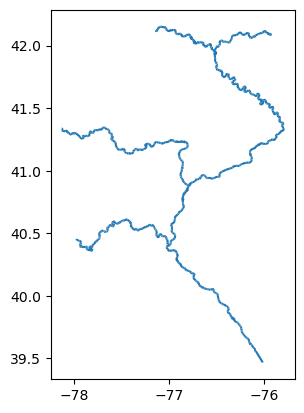

In [20]:


if iFlag_geopandas is not None:
    import geopandas as gpd
    import matplotlib.pyplot as plt
    #use the geopanda package
    #the raw/original geojson file 
    sFilename_geojson = oPyflowline.aBasin[0].sFilename_flowline_filter_geojson
    gdf = gpd.read_file(sFilename_geojson)
    gdf.plot()
    plt.show()
else:
    print('The visulization packages are not installed.')
pass
    

You can also use QGIS or other Python libraries such as GeoPandas.

In [21]:
#the raw/original geojson file 
sFilename_geojson = oPyflowline.aBasin[0].sFilename_flowline_filter_geojson


The plot function provides a few optional arguments such as map projection and spatial extent. 
By default, the spatial extent is full. 
But you can set the extent to a zoom-in region.

now let's run the three major steps/operations one by one.

In [22]:
#run step 1
oPyflowline.flowline_simplification();

Start flowline simplification: 00000001
Basin  00000001  has no dam
Basin  00000001 find flowline vertex
Elapsed time: 0.0032 seconds
Basin  00000001 split flowline
Elapsed time: 7.4150 seconds
Basin  00000001 started correction flow direction
Elapsed time: 2.4126 seconds
Basin  00000001 started loop removal
Elapsed time: 0.6283 seconds
Basin  00000001 started update stream order initial
Elapsed time: 1.0745 seconds
Basin  00000001 find flowline confluence
Elapsed time: 0.0508 seconds
Basin  00000001 started stream segment definition
Elapsed time: 0.0002 seconds
Basin  00000001 started confluence definition
Elapsed time: 0.0200 seconds
Basin  00000001 started stream topology definition
Elapsed time: 0.0003 seconds
Basin  00000001 started stream order definition
Elapsed time: 0.1069 seconds
Finish flowline simplification: 00000001


and check the result using a plot

In [23]:
sFilename_geojson = oPyflowline.aBasin[0].sFilename_flowline_simplified
gdf = gpd.read_file(sFilename_geojson)
gdf.plot()
plt.show()
pass

AttributeError: 'pybasin' object has no attribute 'sFilename_flowline_simplified_geojson'

Similarly, we can zoom in using the extent.

Next, we will creata a mesh from the global MPAS mesh.

In [24]:
#run step 2
#we can either use a rectangle boundary
oPyflowline.iFlag_mesh_boundary = 0 #set to 0 to disable polygon-based
oPyflowline.dLongitude_left= -79
oPyflowline.dLongitude_right= -74.5
oPyflowline.dLatitude_bot= 39.20
oPyflowline.dLatitude_top= 42.8

aCell = oPyflowline.mesh_generation()

Start mesh generation.
80896
80919
87614
128884
128886
128887
150813
151026
151148
151150
151197
151227
151410
151477
151495
151514
151598
151649
151696
151742
151871
151885
151888
151889
151902
151909
151940
151947
151948
151953
151957
151960
151961
151963
151996
152014
152059
152524
152539
152542
152543
152544
152545
152546
152547
152549
152550
152551
152552
152553
152554
152556
152557
152559
152561
152562
152563
152564
152566
152568
152569
152659
152661
152667
152685
152692
152693
152697
152698
152754
152765
152768
152771
152800
152953
153155
153581
153779
153863
153864
153865
153879
153904
153927
153928
154090
154103
154121
154391
154510
154554
154641
154889
155059
155389
155420
155539
156032
156059
156446
156447
156460
156461
156583
156586
156587
156588
156589
156711
156783
156871
157007
157348
157392
157619
157620
157674
157842
157993
157994
158048
158049
158051
158204
158205
158278
158420
158572
158693
158694
158871
158942
159043
159278
159280
159281
159307
159481
159731
159732


In [26]:

#use the geopanda package
#the raw/original geojson file 
sFilename_geojson = oPyflowline.sFilename_mesh
gdf = gpd.read_file(sFilename_geojson)
gdf.plot()
plt.show()
pass

AttributeError: 'flowlinecase' object has no attribute 'sFilename_mesh_geojson'

we can also use a polygon to create a mesh

In [ ]:
oPyflowline.iFlag_mesh_boundary = 1
aCell = oPyflowline.mesh_generation()

In [ ]:
sFilename_geojson = oPyflowline.aBasin[0].sFilename_mesh_geojson
gdf = gpd.read_file(sFilename_geojson)
gdf.plot()
plt.show()

Last, we can generate the conceptual flowline.

In [28]:
#runs step 3
oPyflowline.reconstruct_topological_relationship();

Start topology reconstruction.
Basin  00000001 Start topology reconstruction
Basin  00000001 Start flowline and mesh intersection
Elapsed time: 511.0053 seconds
Basin  00000001 Start return flowline removal
Elapsed time: 0.8706 seconds
Basin  00000001 Start split flowline to edge
Elapsed time: 0.0025 seconds
Basin  00000001 Start remove duplicate flowline
Elapsed time: 0.0526 seconds
Basin  00000001 Start flowline direction correction
Elapsed time: 0.0528 seconds
Basin  00000001 Start flowline direction correction
Elapsed time: 0.0227 seconds
Basin  00000001 Start find flowline confluence
Elapsed time: 0.0436 seconds
Basin  00000001 Start merge flowline
Elapsed time: 0.1086 seconds
Basin  00000001 Start find flowline confluence
Elapsed time: 0.0006 seconds
Basin  00000001 started stream topology definition
Elapsed time: 0.0000 seconds
Finish topology reconstruction: 00000001
Finish topology reconstruction.


Now we can overlap mesh with flowline.

In [ ]:


    #
file1_path = oPyflowline.sFilename_mesh
file2_path = oPyflowline.aBasin[0].sFilename_flowline_conceptual
gdf1 = gpd.read_file(file1_path)
gdf2 = gpd.read_file(file2_path)
fig, ax = plt.subplots()
gdf1.plot(ax=ax, color='blue')
gdf2.plot(ax=ax, color='red')
plt.show()
pass

and take a close look at the outlet region

After this, we can save the model output into a json file.

In [29]:
#export output
oPyflowline.export();

the content of the one of the exported json files can be checked:

In [30]:
with open(oPyflowline.sFilename_mesh_info, 'r') as pJSON:
    parsed = json.load(pJSON)
    print(json.dumps(parsed[0], indent=4))
    

IndexError: list index out of range

In [ ]:
sFilename_flowline_conceptual_info= os.path.join(str(Path(oPyflowline.aBasin[0].sWorkspace_output_basin)  ), oPyflowline.aBasin[0].sFilename_flowline_conceptual_info  )    
                
with open(sFilename_flowline_conceptual_info, 'r') as pJSON:
    parsed = json.load(pJSON)
    print(json.dumps(parsed[0], indent=4))

The outlet associated flowline is always assigned with a dam, because it would be preserved.

Congratulations! You have successfully finished a pyflowline simulation.